In [1]:
# The code was removed by Watson Studio for sharing.

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-03-23 19:28:55,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
1,2019-03-23 17:05:17,42034212,UNSANITARY CONDITION,11225.0,348 MAPLE STREET,MAPLE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.660905,-73.949222,2019-03-27T07:51:44.000,RESIDENTIAL BUILDING,Closed
2,2019-03-23 17:25:14,42034245,WATER LEAK,10460.0,783 GROTE STREET,GROTE STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850269,-73.882685,2019-03-28T14:05:19.000,RESIDENTIAL BUILDING,Closed
3,2019-03-23 10:27:32,42034339,ELECTRIC,10468.0,2800 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.870341,-73.894718,2019-04-08T10:08:17.000,RESIDENTIAL BUILDING,Closed
4,2019-03-23 18:07:09,42034377,PAINT/PLASTER,10453.0,1775 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.848813,-73.912720,NaN,RESIDENTIAL BUILDING,Open


In [2]:
#convert data to PKL
df_data_1.to_pickle('./df_raw.pkl')

#upload file to bucket. Replace cred in client_cred with credentials
client_cred.upload_file('./df_raw.pkl',Bucket,'df_raw_cos.pkl')

#download file from Cloud object storage. Replace cred in client_cred with credentials
client_cred.download_file(Bucket,Key='df_raw_cos.pkl',Filename='./df_raw_local.pkl')

#create new DFrame out of PKL file
NY311_df = pd.read_pickle('./df_raw_local.pkl')

NY311_df.head()

,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
0,2019-03-23 19:28:55,42034156,HEAT/HOT WATER,10032.0,835 RIVERSIDE DRIVE,RIVERSIDE DRIVE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.836079,-73.946179,2019-03-27T08:17:34.000,RESIDENTIAL BUILDING,Closed
1,2019-03-23 17:05:17,42034212,UNSANITARY CONDITION,11225.0,348 MAPLE STREET,MAPLE STREET,ADDRESS,BROOKLYN,The Department of Housing Preservation and Dev...,BROOKLYN,40.660905,-73.949222,2019-03-27T07:51:44.000,RESIDENTIAL BUILDING,Closed
2,2019-03-23 17:25:14,42034245,WATER LEAK,10460.0,783 GROTE STREET,GROTE STREET,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.850269,-73.882685,2019-03-28T14:05:19.000,RESIDENTIAL BUILDING,Closed
3,2019-03-23 10:27:32,42034339,ELECTRIC,10468.0,2800 JEROME AVENUE,JEROME AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.870341,-73.894718,2019-04-08T10:08:17.000,RESIDENTIAL BUILDING,Closed
4,2019-03-23 18:07:09,42034377,PAINT/PLASTER,10453.0,1775 DAVIDSON AVENUE,DAVIDSON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.848813,-73.912720,NaN,RESIDENTIAL BUILDING,Open


In [3]:
print(NY311_df.dtypes)

created_date              datetime64[ns]
unique_key                         int64
complaint_type                    object
incident_zip                     float64
incident_address                  object
street_name                       object
address_type                      object
city                              object
resolution_description            object
borough                           object
latitude                         float64
longitude                        float64
closed_date                       object
location_type                     object
status                            object
dtype: object


In [4]:
#let's see size of DataFrame
NY311_df.shape

(5830085, 15)

In [5]:
#how does the list of complaint types look like?
NY311_df['complaint_type'].unique()

array(['HEAT/HOT WATER', 'UNSANITARY CONDITION', 'WATER LEAK', 'ELECTRIC',
       'PAINT/PLASTER', 'DOOR/WINDOW', 'GENERAL', 'PLUMBING',
       'FLOORING/STAIRS', 'SAFETY', 'APPLIANCE', 'HPD Literature Request',
       'ELEVATOR', 'OUTSIDE BUILDING', 'PAINT - PLASTER', 'HEATING',
       'GENERAL CONSTRUCTION', 'Unsanitary Condition', 'Safety',
       'General', 'Appliance', 'Outside Building', 'Plumbing', 'NONCONST',
       'CONSTRUCTION', 'AGENCY', 'STRUCTURAL', 'VACANT APARTMENT'],
      dtype=object)

In [6]:

#lets use value_counts to list the times each complaint type appears in the Dataframe

NY311_df['complaint_type'].value_counts()



HEAT/HOT WATER            1147775
HEATING                    887869
PLUMBING                   700177
GENERAL CONSTRUCTION       500863
UNSANITARY CONDITION       430555
PAINT - PLASTER            361258
PAINT/PLASTER              339425
ELECTRIC                   301795
NONCONST                   260890
DOOR/WINDOW                198274
WATER LEAK                 185235
GENERAL                    144733
FLOORING/STAIRS            134669
APPLIANCE                  108724
HPD Literature Request      52830
SAFETY                      49506
OUTSIDE BUILDING             6981
ELEVATOR                     6316
Unsanitary Condition         5494
CONSTRUCTION                 5078
General                      1163
Safety                        423
STRUCTURAL                     16
Plumbing                       11
AGENCY                          9
VACANT APARTMENT                8
Outside Building                6
Appliance                       2
Name: complaint_type, dtype: int64

In [7]:
#let's see how can we create a new dataframe just with complaint types and value counts

#convert to DFrame
complaints_counts = NY311_df['complaint_type'].value_counts().to_frame()
#rename column with amount of complaints per type
complaints_counts.rename(columns={'complaint_type': 'value_counts'}, inplace=True)
#rename index
complaints_counts.index.name = 'complaint_type'
complaints_counts


,value_counts
complaint_type,
HEAT/HOT WATER,1147775
HEATING,887869
PLUMBING,700177
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,430555
PAINT - PLASTER,361258
PAINT/PLASTER,339425
ELECTRIC,301795
NONCONST,260890


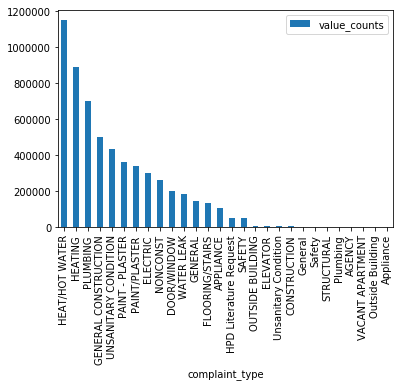

In [8]:
#now we plot a barchart to show the most frequent complaint type
import matplotlib.pyplot as plt
%matplotlib inline

complaints_counts.plot(kind='bar')

In [9]:
#the data still needs a bit of cleaning.
#note that the quiz questions tell us to consider complaints created up to 31st Dec 2018, so we have to remove all complaints placed after that date
NY311_df2=NY311_df[NY311_df['created_date']<'2019-01-01']

#note how the original Dataframe size has reduced from 5830085 to 5517069 rows
print('After removing complaints placed after 31st december 2018, new DF shape is:',NY311_df2.shape)

#we confirm that there are no dates after31st December 2018 in the created_date column
NY311_df2.head()

After removing complaints placed after 31st december 2018, new DF shape is: (5517069, 15)


,created_date,unique_key,complaint_type,incident_zip,incident_address,street_name,address_type,city,resolution_description,borough,latitude,longitude,closed_date,location_type,status
1109,2018-12-04 08:48:25,42079326,PLUMBING,10024.0,513 AMSTERDAM AVENUE,AMSTERDAM AVENUE,ADDRESS,NEW YORK,The Department of Housing Preservation and Dev...,MANHATTAN,40.786755,-73.975679,2019-03-28T14:47:16.000,RESIDENTIAL BUILDING,Closed
1111,2018-10-17 10:31:12,40572946,UNSANITARY CONDITION,10453.0,2105 WALTON AVENUE,WALTON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.854495,-73.905534,2019-03-26T10:24:25.000,RESIDENTIAL BUILDING,Closed
1112,2018-10-17 10:31:12,40574230,UNSANITARY CONDITION,10453.0,2105 WALTON AVENUE,WALTON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.854495,-73.905534,2019-03-26T10:24:25.000,RESIDENTIAL BUILDING,Closed
1113,2018-10-17 10:31:12,40577369,UNSANITARY CONDITION,10453.0,2105 WALTON AVENUE,WALTON AVENUE,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.854495,-73.905534,2019-03-26T10:24:25.000,RESIDENTIAL BUILDING,Closed
1114,2018-10-26 12:48:06,40667081,UNSANITARY CONDITION,10453.0,20 RICHMAN PLAZA,RICHMAN PLAZA,ADDRESS,BRONX,The Department of Housing Preservation and Dev...,BRONX,40.851754,-73.922736,2019-03-26T09:11:45.000,RESIDENTIAL BUILDING,Closed


In [10]:
#note some categories of complaint seem to have more than one name for similar kind of complaints

#since  the quizz question groups HEAT/HOT WATER and HEATING complaint types lets merge all under the same type:'HEATING', by renaming 'HEAT/HOT WATER'
NY311_df2['complaint_type'].replace('HEAT/HOT WATER','HEATING',inplace=True)

#similarly, we can also merge PAINT - PLASTER and PAINT/PLASTER types into PAINT/PLASTER
NY311_df2['complaint_type'].replace('PAINT - PLASTER','PAINT/PLASTER',inplace=True)

# we could do the same for other categories that seem to have more than one name
#(i.e construction and General Construction), but since the purpose of the exercise is to deal with the most important ones, we will stop renaming here.

complaints_counts2 = NY311_df2['complaint_type'].value_counts().to_frame()
complaints_counts2.rename(columns={'complaint_type': 'value_counts'}, inplace=True)

complaints_counts2.index.name = 'complaint_type'
complaints_counts2
#we see how the value count is slightly reduced in most categories due to slicing out complaints placed in 2019

/opt/conda/envs/Python36/lib/python3.6/site-packages/pandas/core/generic.py:6586: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


,value_counts
complaint_type,
HEATING,1911657
PLUMBING,673406
PAINT/PLASTER,672333
GENERAL CONSTRUCTION,500863
UNSANITARY CONDITION,390908
ELECTRIC,289345
NONCONST,260890
DOOR/WINDOW,179573
WATER LEAK,167900


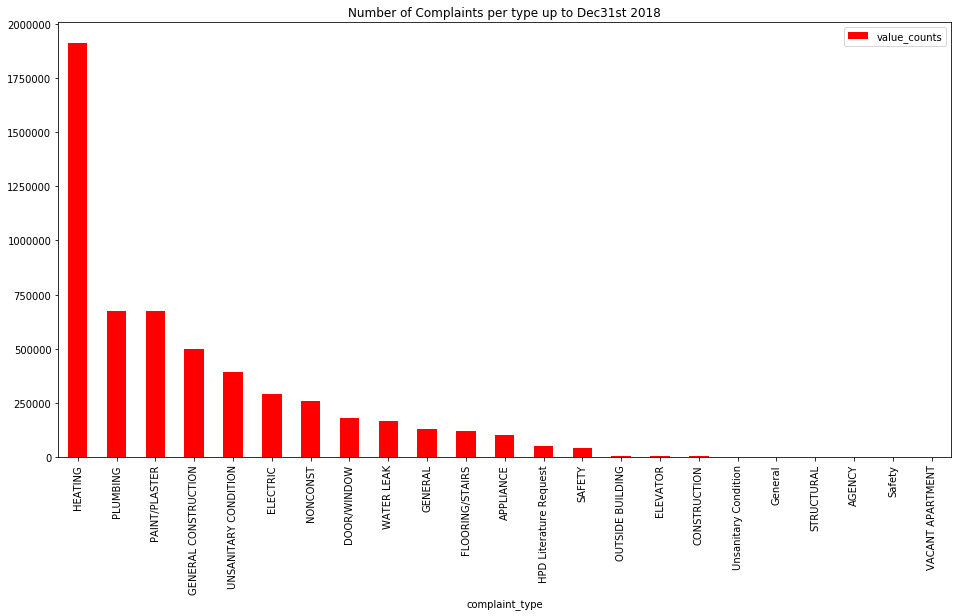

In [11]:
#plot bar chart to show the amount of complaint types. 

#plot size
width = 16
height = 8

#let's use a different color to differentiate from the previous graph
complaints_counts2.plot(kind='bar',color='r',figsize=(width, height))
plt.title('Number of Complaints per type up to Dec31st 2018')
plt.show()

#We can see how the heating related complaints are by far much more frequent than the rest.
#We can also see how the PAINT/PLASTER category after merging it now appears as the 3rd most frequent (was 6th before)

In [12]:
#CONCLUDING REMARKS: by far the Heating related complaints are the most frequent and should be addressed as a top priority.GENERAL CONSTRUCTION complaints are just above 500000 
#Also there is a bit of mess in the original data with the labelling of the different categories some of which need some renaming/merging to make sure we group together the same type.
#Probably due to NYC changing names of categories at some point back in time